# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
weather_api_key = "b66506d86c28e3321e7e88b49d4983d5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = 'london'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#get weather data for London and convert reponse to json
response = requests.get(query_url + city)
weather_json = response.json()
# let's see the result
display(weather_json)


{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'},
  {'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 53.19,
  'feels_like': 47.8,
  'temp_min': 52,
  'temp_max': 55,
  'pressure': 1002,
  'humidity': 93},
 'visibility': 3800,
 'wind': {'speed': 10.29, 'deg': 320, 'gust': 25.28},
 'rain': {'1h': 0.51},
 'clouds': {'all': 100},
 'dt': 1598662405,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1598677744,
  'sunset': 1598727246},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
city_weather = []



for city in cities:
    #gets response for each city
    
    response = requests.get(query_url + city).json()
    
    try:
        city_dict = {
            "city_name" : response["name"],
            "cloudiness" : response ["clouds"]["all"],
            "country" : response["sys"]["country"],
            "data" : response["dt"],
            "humidity" :response["main"]["humidity"],
            "lat" : response["coord"]["lat"],
            "lon" : response["coord"]["lon"],
            "max_temp" : response["main"]["temp_max"],
            "wind_speed" : response["wind"]["speed"]
        }
        city_weather.append(city_dict)
    
        print(f"city_name:{response['name']} of ID:{response['id']}")
    
    # Handle exceptions for a city that is not available in the API
    except:
        # Append null values
        print("City not found. Skipping...")


City not found. Skipping...
city_name:Albany of ID:5106841
city_name:Yellowknife of ID:6185377
city_name:Berlevåg of ID:780687
city_name:Melfort of ID:6071876
city_name:Harbour Breton of ID:5970478
City not found. Skipping...
city_name:San Jerónimo of ID:3929611
city_name:Merrill of ID:5262680
city_name:Bluff of ID:2206939
city_name:Puerto Ayora of ID:3652764
city_name:Castro of ID:3466704
city_name:Cape Town of ID:3369157
city_name:Punta Arenas of ID:3874787
city_name:Ushuaia of ID:3833367
city_name:Portland of ID:5746545
city_name:Busselton of ID:2075265
city_name:Dingle of ID:1714733
city_name:Bubaque of ID:2374583
city_name:Souillac of ID:933995
city_name:Atuona of ID:4020109
city_name:Te Anau of ID:2181625
city_name:Kabo of ID:2386042
city_name:Sungai Penuh of ID:1625929
city_name:Cedar City of ID:5536630
city_name:Shestakovo of ID:2016733
city_name:College of ID:5859699
city_name:Rikitea of ID:4030556
city_name:Nador of ID:2541479
city_name:Zyryanka of ID:2119283
city_name:Uperna

city_name:Vila of ID:7117100
city_name:Kui Buri of ID:1152562
city_name:Coyhaique of ID:3894426
city_name:Ust'-Omchug of ID:2120047
city_name:Bosaso of ID:64013
city_name:Juneau of ID:5554072
city_name:Coquimbo of ID:3893629
city_name:Weihai of ID:1791673
city_name:Celestún of ID:3531368
city_name:Nizhniy Tsasuchey of ID:2019118
City not found. Skipping...
city_name:Aitape of ID:2101169
city_name:Province of Mantua of ID:3174050
City not found. Skipping...
city_name:Meulaboh of ID:1214488
city_name:Ewo of ID:2260009
city_name:Beloha of ID:1067565
city_name:Saskylakh of ID:2017155
city_name:Saint-Philippe of ID:935215
city_name:Paciran of ID:1633442
City not found. Skipping...
city_name:Geraldton of ID:2070998
city_name:Laas of ID:3175096
city_name:Rapid Valley of ID:5768244
city_name:Atambua of ID:1651103
city_name:Orsha of ID:624079
city_name:Marabu of ID:1738050
city_name:Timberlake of ID:4789648
city_name:Barra de Tecoanapa of ID:3516171
city_name:Indramayu of ID:1643078
city_name:U

city_name:Mezen' of ID:527321
city_name:Honiara of ID:2108502
city_name:Gubkinskiy of ID:1539209
city_name:San Jose of ID:5392171
city_name:Antalaha of ID:1071296
city_name:Tura of ID:1254046
city_name:Kouango of ID:2385535
city_name:Chittarkonda of ID:1274055
city_name:Ingham of ID:4997130
city_name:Poum of ID:2138555
city_name:Sørland of ID:3137469
city_name:Kosh-Agach of ID:1502422
city_name:Kizema of ID:547871
city_name:Mindelo of ID:3374462
City not found. Skipping...
city_name:Torrevieja of ID:2510253
city_name:Sitka of ID:5557293
City not found. Skipping...
city_name:Toledo of ID:2510407
city_name:Atar of ID:2381334
city_name:Havelock of ID:4470244
city_name:Tigil' of ID:2120612
city_name:Ambovombe of ID:1079048
city_name:Khudumelapye of ID:933633
city_name:Okhotsk of ID:2122605
city_name:Wembley of ID:2058682
city_name:Hanyang of ID:1798537
city_name:Piaçabuçu of ID:3454005
city_name:Alyangula of ID:2079582
city_name:Kasimov of ID:551891
city_name:Hay River of ID:5972762
city_n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame(city_weather)
weather_df.head()

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed
0,Albany,100,US,1598662731,82,42.60,-73.97,68.00,1.54
1,Yellowknife,90,CA,1598663004,66,62.46,-114.35,55.40,10.29
2,Berlevåg,54,NO,1598663004,68,70.86,29.09,44.49,6.40
3,Melfort,20,CA,1598663004,55,52.87,-104.62,66.20,10.29
4,Harbour Breton,6,CA,1598663005,100,47.48,-55.80,57.99,7.00


In [6]:
weather_df.to_csv("weather_df.csv")
weather_df.describe()

,cloudiness,data,humidity,lat,lon,max_temp,wind_speed
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,48.820604,1.598663e+09,72.376554,22.274227,20.431066,66.785240,8.122362
std,40.265067,7.921048e+01,19.377050,33.934168,91.853303,13.734588,5.521410
min,0.000000,1.598663e+09,9.000000,-54.800000,-175.200000,30.200000,0.470000
25%,2.000000,1.598663e+09,62.000000,-6.710000,-57.970000,55.990000,4.050000
50%,41.000000,1.598663e+09,77.000000,28.970000,25.570000,68.430000,6.930000
75%,90.000000,1.598663e+09,87.000000,50.690000,100.865000,78.080000,10.525000
max,100.000000,1.598663e+09,100.000000,78.220000,178.420000,102.200000,35.570000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humid = weather_df.loc[weather_df["humidity"]>100]
humid

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature (08/28/2020)')

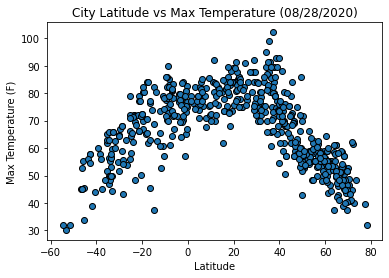

In [15]:
plt.scatter(weather_df["lat"],weather_df["max_temp"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (08/28/2020)")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity (08/28/2020)')

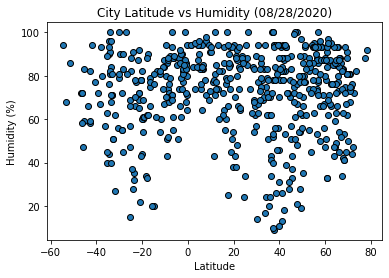

In [16]:
plt.scatter(weather_df["lat"],weather_df["humidity"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (08/28/2020)")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness (08/28/2020)')

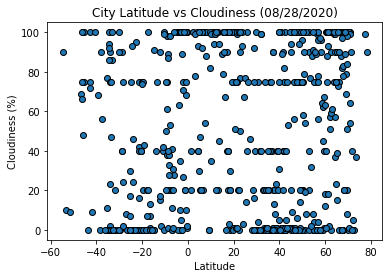

In [17]:
plt.scatter(weather_df["lat"],weather_df["cloudiness"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (08/28/2020)")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed (08/28/2020)')

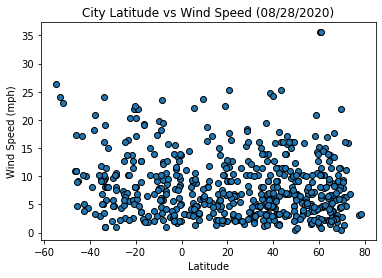

In [18]:
plt.scatter(weather_df["lat"],weather_df["wind_speed"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (08/28/2020)")

## Plots for Linear Regression

### Create northen and sourthen hemisphere

In [29]:
north_hem = weather_df.loc[weather_df["lat"]>= 0]
south_hem = weather_df.loc[weather_df["lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6449264489153365


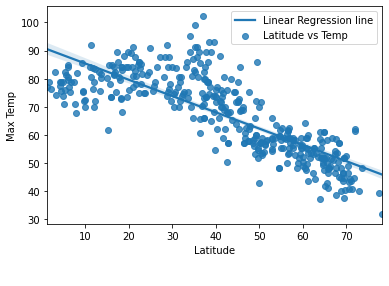

In [39]:
import seaborn as sb
x_values = north_hem["lat"]
y_values = north_hem["max_temp"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5492335760800016


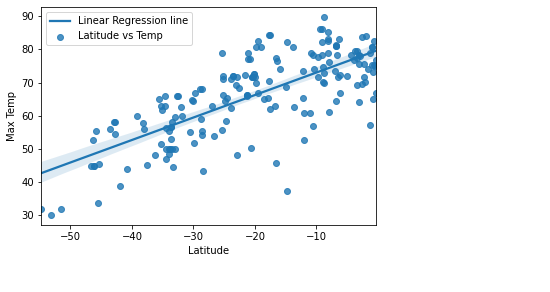

In [40]:
x_values = south_hem["lat"]
y_values = south_hem["max_temp"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])
print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007234953061963168


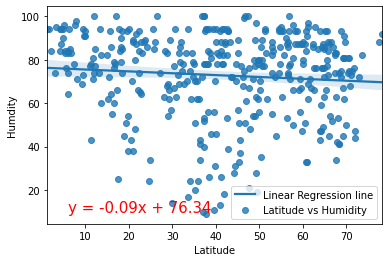

In [41]:
x_values = north_hem["lat"]
y_values = north_hem["humidity"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.020388660522676783


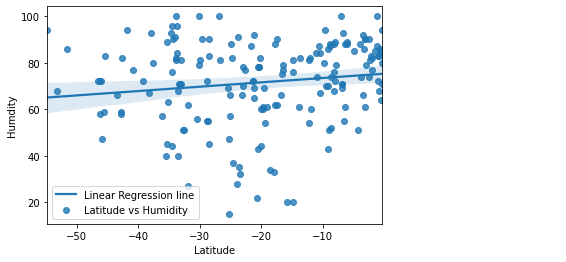

In [43]:
x_values = south_hem["lat"]
y_values = south_hem["humidity"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.legend(labels=['Linear Regression line', 'Latitude vs Humidity'])
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00010688895778220868


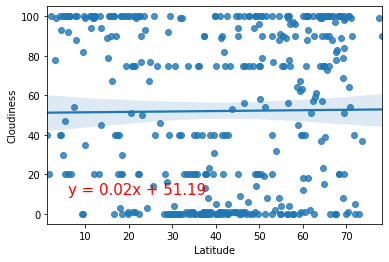

In [45]:
x_values = north_hem["lat"]
y_values = north_hem["cloudiness"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0010778804902796106


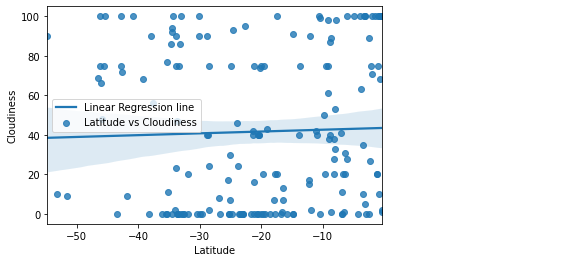

In [46]:
x_values = south_hem["lat"]
y_values = south_hem["cloudiness"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend(labels=['Linear Regression line', 'Latitude vs Cloudiness'])
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00018884779290406748


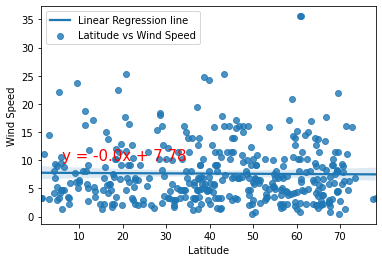

In [47]:
x_values = north_hem["lat"]
y_values = north_hem["wind_speed"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0301636261139424


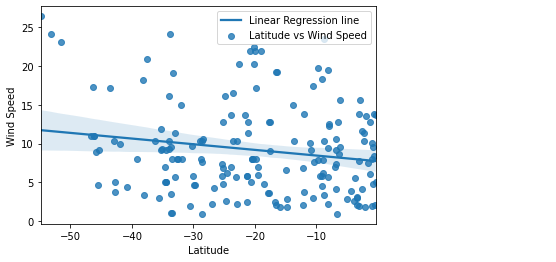

In [48]:
x_values = south_hem["lat"]
y_values = south_hem["wind_speed"]
sb.regplot(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.legend(labels=['Linear Regression line', 'Latitude vs Wind Speed'])
print(f"The r-squared is: {rvalue**2}")
plt.show()